In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import pickle
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
path = os.path.join(os.environ['HOMEPATH'], "FlightPricePredict")
train_df = pd.read_csv(os.path.join(path, "df3_prepared.csv"))
test_df = pd.read_csv(os.path.join(path, "Test_prepared.csv"))

In [3]:
train_df.tail()

,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
10677,0,4107,9,4,19.0,55.0,22,25,2,30,...,0,0,0,1,0,0,0,0,0,0
10678,0,4145,27,4,20.0,45.0,23,20,2,35,...,0,0,0,1,0,0,0,0,0,0
10679,0,7229,27,4,8.0,20.0,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10680,0,12648,1,3,11.0,30.0,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1
10681,2,11753,9,5,10.0,55.0,19,15,8,20,...,0,0,1,0,0,1,0,0,0,0


In [6]:
train_df.Airline_IndiGo.value_counts()

0    8629
1    2053
Name: Airline_IndiGo, dtype: int64

In [5]:
test_df.tail()

,Total_Stops,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
2666,1,6,6,20,30,20,25,23,55,1,...,0,0,0,1,0,0,0,0,0,0
2667,0,27,3,14,20,16,55,2,35,0,...,0,0,0,1,0,0,0,0,0,0
2668,1,6,3,21,50,4,25,6,35,0,...,0,0,1,0,0,1,0,0,0,0
2669,1,6,3,4,0,19,15,15,15,1,...,0,0,1,0,0,1,0,0,0,0
2670,1,15,6,4,55,19,15,14,20,0,...,0,0,1,0,0,1,0,0,0,0


##  Training the Dataset

In [6]:
X = pd.concat( [ train_df.iloc[:,0:1], train_df.iloc[:,2:] ] ,axis=1)  #Feature = everything but Price (label)
y = train_df['Price'] # Price (label)

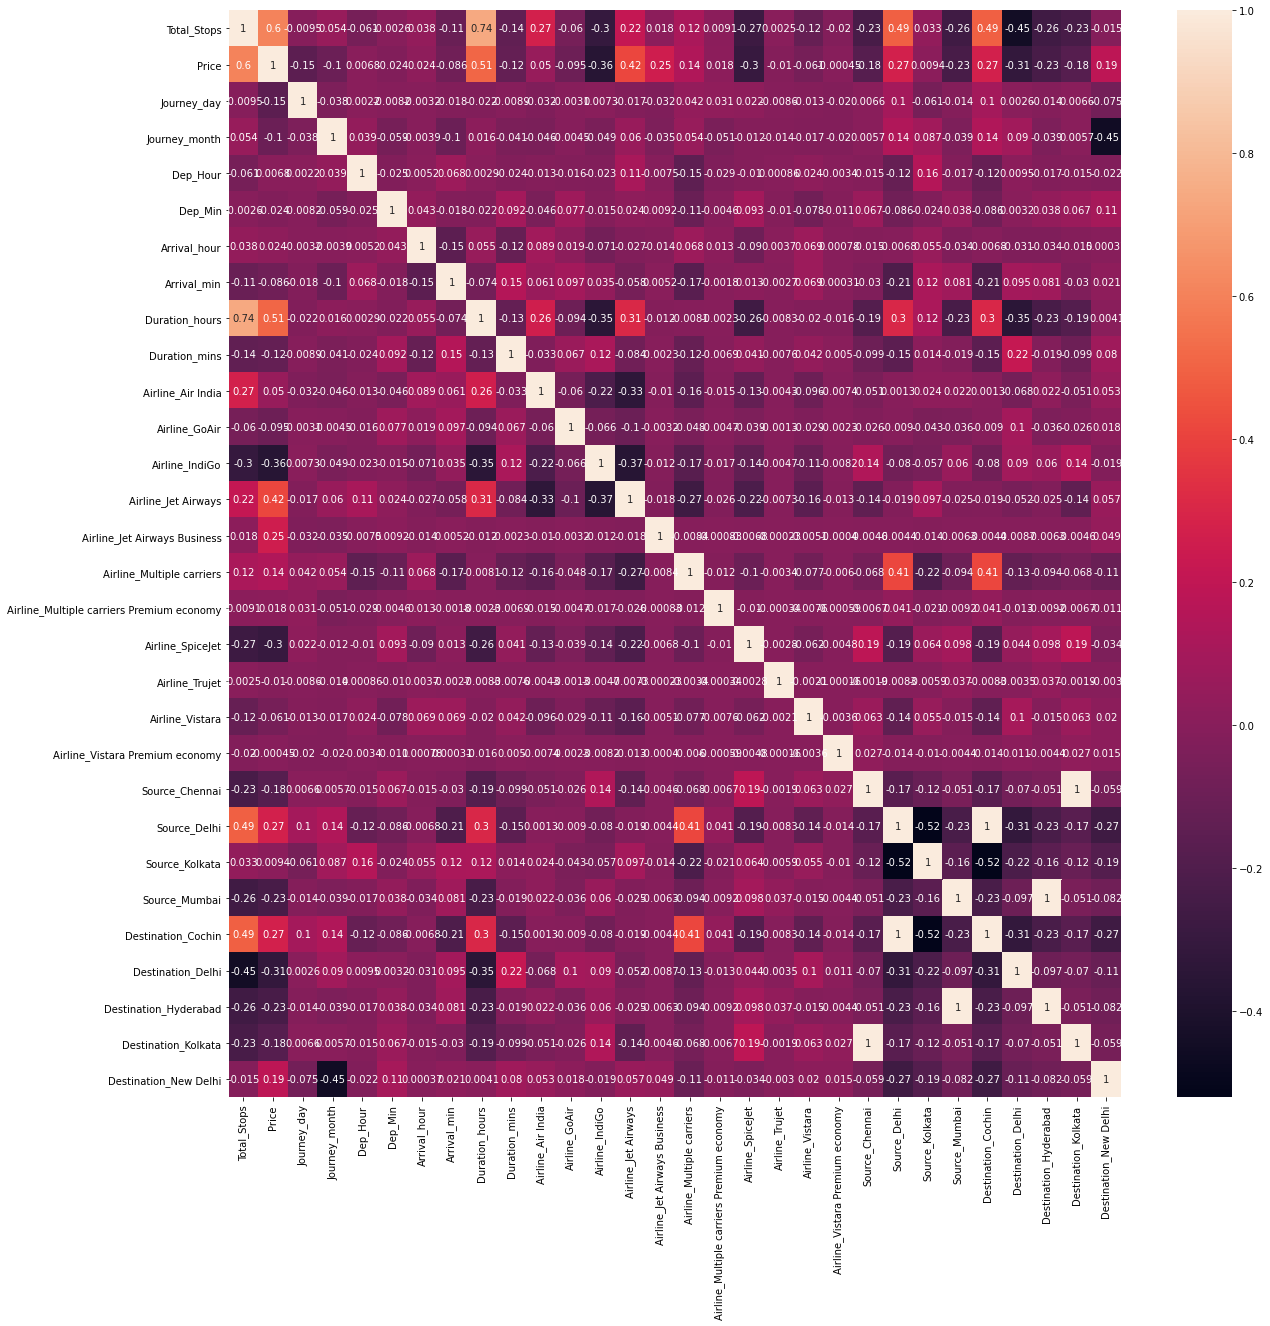

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(train_df.corr(), annot=True)
plt.show()

## Splitting data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

### ExtraTrees Regressor

In [9]:
selection = ExtraTreesRegressor()
selection.fit(X_train,y_train)
selection.feature_importances_

array([2.14695695e-01, 1.39200137e-01, 5.22923536e-02, 2.47935290e-02,
       2.26849942e-02, 2.81794832e-02, 2.07441335e-02, 1.33628902e-01,
       1.98915988e-02, 1.09226879e-02, 1.57213801e-03, 1.41683311e-02,
       1.42511626e-01, 7.11414153e-02, 2.45182294e-02, 1.05045866e-03,
       2.95857729e-03, 1.38944599e-04, 4.84074173e-03, 4.99260063e-05,
       3.64823787e-04, 4.76728106e-03, 3.27101384e-03, 7.61792378e-03,
       7.98648648e-03, 1.93245383e-02, 6.99238783e-03, 4.15819976e-04,
       1.92758220e-02])

In [10]:
feature_importance = pd.Series(selection.feature_importances_, index=X.columns).sort_values(axis=0, ascending=False)
feature_importance.head()

Total_Stops                     0.214696
Airline_Jet Airways             0.142512
Journey_day                     0.139200
Duration_hours                  0.133629
Airline_Jet Airways Business    0.071141
dtype: float64

In [11]:
ET_prediction_y = selection.predict(X_test)

In [12]:
selection.score(X_train, y_train)

0.9692479632507

In [13]:
selection.score(X_test, y_test)

0.8076308934936833

### RandomForest Regressor

In [14]:
RandForest_Reg = RandomForestRegressor()
RandForest_Reg.fit(X_train,y_train)
RandForest_Reg.feature_importances_

array([3.47036265e-02, 1.26342916e-01, 6.15772428e-02, 2.93555571e-02,
       2.26592675e-02, 3.56518968e-02, 2.12322026e-02, 4.43441683e-01,
       2.03147013e-02, 5.43593004e-03, 1.20767051e-03, 8.17559634e-03,
       6.28656810e-02, 6.36350619e-02, 2.08343895e-02, 8.65006615e-04,
       2.72119003e-03, 5.63236235e-06, 3.14784435e-03, 2.67446394e-05,
       6.21109812e-04, 2.98370951e-03, 4.87426290e-03, 2.87126891e-03,
       3.19527944e-03, 2.38184161e-04, 3.61383545e-03, 4.91621115e-04,
       1.69108880e-02])

In [15]:
rf_feature_importance = pd.Series(RandForest_Reg.feature_importances_, index=X.columns).sort_values(axis=0, ascending=False)
rf_feature_importance.head()

Duration_hours                  0.443442
Journey_day                     0.126343
Airline_Jet Airways Business    0.063635
Airline_Jet Airways             0.062866
Journey_month                   0.061577
dtype: float64

In [17]:
prediction_y = RandForest_Reg.predict(X_test)

In [18]:
RandForest_Reg.score(X_train, y_train)

0.9527410775365475

In [19]:
RandForest_Reg.score(X_test, y_test)

0.7984925958884341

### Metrics Performance

In [21]:
ET_MSE = metrics.mean_squared_error(y_test, ET_prediction_y)
ET_RMSE = np.sqrt(ET_MSE)
ET_MAE = metrics.mean_absolute_error(y_test, ET_prediction_y)

In [112]:
print("ExtraTrees MSE:",ET_MSE,"\n","ExtraTrees RMSE:",ET_RMSE,"\n",
      "ExtraTrees MAE:", ET_MAE)

ExtraTrees MSE: 4147873.509517878 
 ExtraTrees RMSE: 2036.6328853079726 
 ExtraTrees MAE: 1220.272768522851


In [23]:
MSE = metrics.mean_squared_error(y_test, prediction_y)
RMSE = np.sqrt(MSE)
MAE = metrics.mean_absolute_error(y_test, prediction_y)

In [113]:
print("RandomForest MSE:",MSE,"\n","RandomForest RMSE:",RMSE,"\n",
      "RandomForest MAE:", MAE)

RandomForest MSE: 4344913.997189214 
 RandomForest RMSE: 2084.445729010284 
 RandomForest MAE: 1173.102337994559


## Cross Validation for Extra Trees

In [101]:
et_par_dist = {'n_estimators':[10,50,100,200,300],
              'max_depth':[3,5,10,None],
              'bootstrap':[True,False],
              'max_features':['auto','sqrt','log2'],
              'min_samples_split':[2,5,10,15,20],
              'min_samples_leaf':[1,2,3]}

In [102]:
et_rand_search = RandomizedSearchCV(estimator=selection, param_distributions=et_par_dist, scoring='r2',
                                    n_jobs=-1, verbose=2, random_state=42, cv=5, n_iter=10)

In [103]:
et_rand_search.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [10, 50, 100, 200,
                                                         300]},
                   random_state=42, scoring='r2', verbose=2)

In [104]:
dff= pd.DataFrame(et_rand_search.cv_results_)
dff.tail()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.087544,0.005774,0.008776,0.004433,10,20,2,log2,3,False,"{'n_estimators': 10, 'min_samples_split': 20, ...",0.382525,0.458122,0.437250,0.410201,0.395890,0.416798,0.027500,10
6,4.925622,0.138399,0.310171,0.055940,300,20,3,sqrt,None,False,"{'n_estimators': 300, 'min_samples_split': 20,...",0.757782,0.768058,0.779749,0.776077,0.769738,0.770281,0.007546,2
7,1.770934,0.060119,0.118800,0.011033,300,15,3,sqrt,3,False,"{'n_estimators': 300, 'min_samples_split': 15,...",0.418338,0.422330,0.431227,0.455078,0.450561,0.435507,0.014808,9
8,9.266588,0.235396,0.106043,0.028878,200,10,3,auto,None,False,"{'n_estimators': 200, 'min_samples_split': 10,...",0.836623,0.835663,0.862376,0.845398,0.849380,0.845888,0.009744,1
9,0.347296,0.026324,0.023671,0.004186,50,20,2,sqrt,3,True,"{'n_estimators': 50, 'min_samples_split': 20, ...",0.438060,0.423462,0.427277,0.463187,0.428607,0.436119,0.014361,8


In [105]:
et_rand_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

In [106]:
et_rand_search.best_score_

0.8458880817974406

In [107]:
post_CV_prediction = et_rand_search.predict(X_test)

In [108]:
et_rand_search.score(X_train,y_train)

0.9145150217041792

In [109]:
et_rand_search.score(X_test,y_test)

0.9246767296652895

In [114]:
print('Post CV ExtraTrees MSE:', metrics.mean_squared_error(y_test, post_CV_prediction))
print('Post CV ExtraTrees RMSE:', np.sqrt(metrics.mean_squared_error(y_test, post_CV_prediction)))
print('Post CV ExtraTrees MAE:', metrics.mean_absolute_error(y_test, post_CV_prediction))

Post CV ExtraTrees MSE: 1624124.597477094
Post CV ExtraTrees RMSE: 1274.4114710238189
Post CV ExtraTrees MAE: 794.1491959676137


##  To Pickle the model

In [117]:
file= open('flight_et_cv.pkl','wb')
pickle.dump(et_rand_search,file)

In [118]:
model= open('flight_et_cv.pkl', 'rb')
etrees = pickle.load(model)

In [121]:
the_trees_that_predict=etrees.predict(X_test)

In [122]:
metrics.r2_score(y_test,the_trees_that_predict)

0.9246767296652895